In [52]:
import numpy as np

In [53]:
def f(x):
    return np.exp(np.cos(3 * x))


x_min, x_max = 0, np.pi

In [54]:
k = 20
multiplier = 1
x_list_uniform = np.linspace(x_min, x_max, 1 * k)
x_list_chebyshev = (0.5 * (x_min + x_max) +
                    0.5 * (x_max - x_min) * np.cos(
                    (2 * np.arange(1, multiplier * k + 1) - 1) / (2 * multiplier * k) * np.pi))

x_list_extended = np.linspace(x_min, x_max, 3 * k)
y_list_extended = f(x_list_extended)

In [55]:
from functools import cache, lru_cache


@cache
def calc_separated_differences_new(f, i1, i2):
    """
    Посчитать разделенные суммы от i1 до i2 включительно
    """
    k = i2 - i1
    if k == 0:
        assert False
    if k == 1:
        return (f(x_list_uniform[i1 + 1]) - f(x_list_uniform[i1])) / (x_list_uniform[i1 + 1] - x_list_uniform[i1])
    if k >= 2:
        f1 = calc_separated_differences_new(f, i1 + 1, i2)
        f2 = calc_separated_differences_new(f, i1, i2 - 1)
        return (f1 - f2) / (x_list_uniform[i2] - x_list_uniform[i1])


def inter(f, x_list, x):
    p = f(x_list[0])
    for k in range(1, len(x_list)):
        w = 1
        for j in range(k):
            w *= x - x_list[j]
        sep = calc_separated_differences_new(f, 0, k)
        p += sep * w
    return p

In [56]:
y_inter_uniform_1k = inter(f, x_list_uniform, x_list_extended)

In [57]:
from functools import cache, lru_cache


@cache
def calc_separated_differences_new(f, i1, i2):
    """
    Посчитать разделенные суммы от i1 до i2 включительно
    """
    k = i2 - i1
    if k == 0:
        assert False
    if k == 1:
        return (f(x_list_chebyshev[i1 + 1]) - f(x_list_chebyshev[i1])) / (
                    x_list_chebyshev[i1 + 1] - x_list_chebyshev[i1])
    if k >= 2:
        f1 = calc_separated_differences_new(f, i1 + 1, i2)
        f2 = calc_separated_differences_new(f, i1, i2 - 1)
        return (f1 - f2) / (x_list_chebyshev[i2] - x_list_chebyshev[i1])


def inter(f, x_list, x):
    p = f(x_list[0])
    for k in range(1, len(x_list)):
        w = 1
        for j in range(k):
            w *= x - x_list[j]
        sep = calc_separated_differences_new(f, 0, k)
        p += sep * w
    return p

In [58]:
y_inter_chebyshev_1k = inter(f, x_list_chebyshev, x_list_extended)

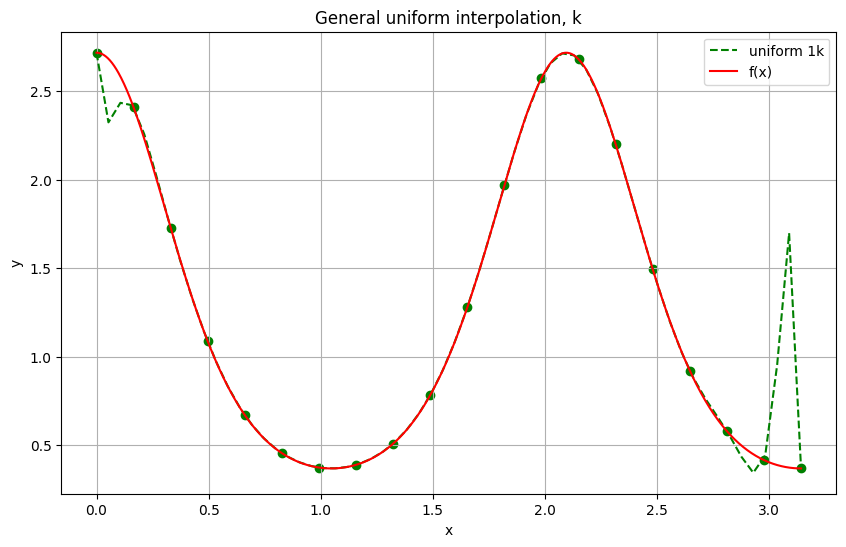

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x_list_extended, y_inter_uniform_1k, 'g--', label='uniform 1k')
plt.plot(np.linspace(x_min, x_max, 1000), f(np.linspace(x_min, x_max, 1000)), 'r-', label='f(x)')
plt.scatter(x_list_uniform, f(x_list_uniform), c='g')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('General uniform interpolation, k')
plt.grid(True)

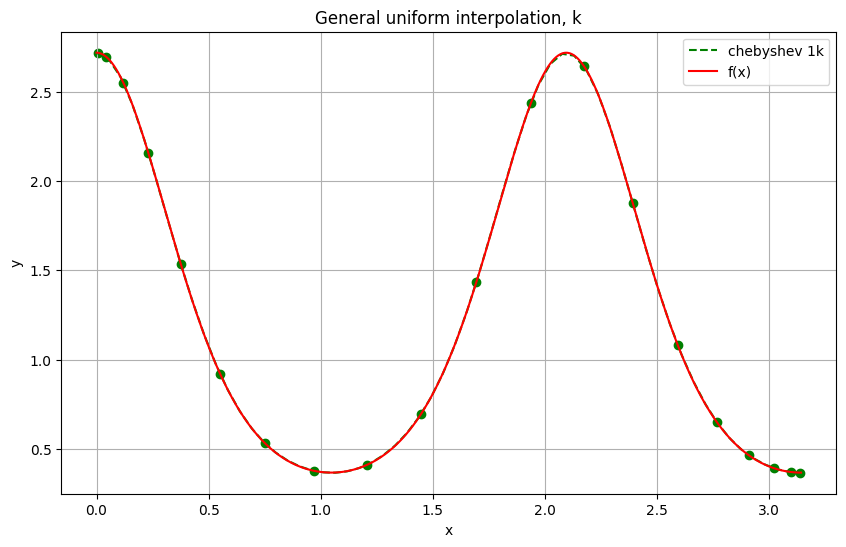

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(x_list_extended, y_inter_chebyshev_1k, 'g--', label='chebyshev 1k')
plt.plot(np.linspace(x_min, x_max, 1000), f(np.linspace(x_min, x_max, 1000)), 'r-', label='f(x)')
plt.scatter(x_list_chebyshev, f(x_list_chebyshev), c='g')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('General uniform interpolation, k')
plt.grid(True)

In [61]:
multiplier = 2
x_list_uniform = np.linspace(x_min, x_max, multiplier * k)
x_list_chebyshev = (0.5 * (x_min + x_max) +
                    0.5 * (x_max - x_min) * np.cos(
            (2 * np.arange(1, multiplier * k + 1) - 1) / (2 * multiplier * k) * np.pi))

x_list_extended = np.linspace(x_min, x_max, 3 * k)
y_list_extended = f(x_list_extended)

In [62]:
from functools import cache, lru_cache


@cache
def calc_separated_differences_new(f, i1, i2):
    """
    Посчитать разделенные суммы от i1 до i2 включительно
    """
    k = i2 - i1
    if k == 0:
        assert False
    if k == 1:
        return (f(x_list_uniform[i1 + 1]) - f(x_list_uniform[i1])) / (x_list_uniform[i1 + 1] - x_list_uniform[i1])
    if k >= 2:
        f1 = calc_separated_differences_new(f, i1 + 1, i2)
        f2 = calc_separated_differences_new(f, i1, i2 - 1)
        return (f1 - f2) / (x_list_uniform[i2] - x_list_uniform[i1])


def inter(f, x_list, x):
    p = f(x_list[0])
    for k in range(1, len(x_list)):
        w = 1
        for j in range(k):
            w *= x - x_list[j]
        sep = calc_separated_differences_new(f, 0, k)
        p += sep * w
    return p

In [63]:
y_inter_uniform_2k = inter(f, x_list_uniform, x_list_extended)

In [64]:
from functools import cache, lru_cache


@cache
def calc_separated_differences_new(f, i1, i2):
    """
    Посчитать разделенные суммы от i1 до i2 включительно
    """
    k = i2 - i1
    if k == 0:
        assert False
    if k == 1:
        return (f(x_list_chebyshev[i1 + 1]) - f(x_list_chebyshev[i1])) / (
                    x_list_chebyshev[i1 + 1] - x_list_chebyshev[i1])
    if k >= 2:
        f1 = calc_separated_differences_new(f, i1 + 1, i2)
        f2 = calc_separated_differences_new(f, i1, i2 - 1)
        return (f1 - f2) / (x_list_chebyshev[i2] - x_list_chebyshev[i1])


def inter(f, x_list, x):
    p = f(x_list[0])
    for k in range(1, len(x_list)):
        w = 1
        for j in range(k):
            w *= x - x_list[j]
        sep = calc_separated_differences_new(f, 0, k)
        p += sep * w
    return p

In [65]:
y_inter_chebyshev_2k = inter(f, x_list_chebyshev, x_list_extended)

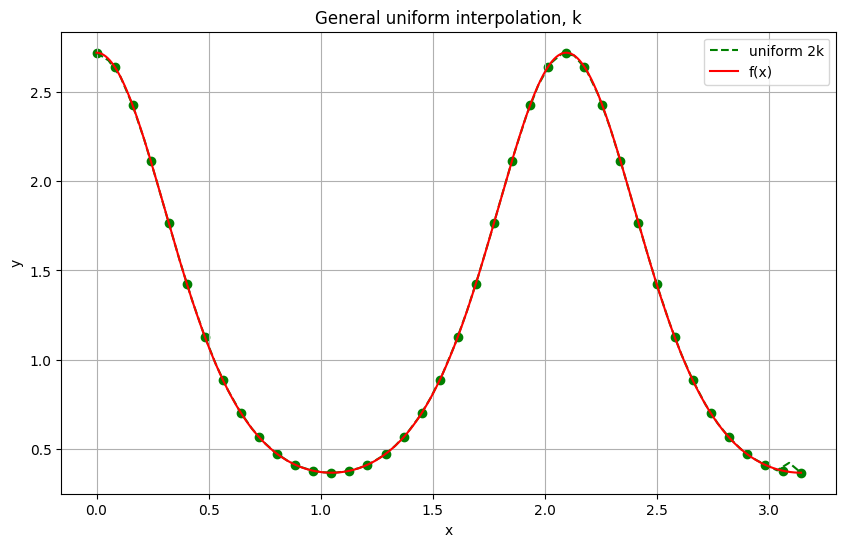

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(x_list_extended, y_inter_uniform_2k, 'g--', label='uniform 2k')
plt.plot(np.linspace(x_min, x_max, 1000), f(np.linspace(x_min, x_max, 1000)), 'r-', label='f(x)')
plt.scatter(x_list_uniform, f(x_list_uniform), c='g')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('General uniform interpolation, k')
plt.grid(True)

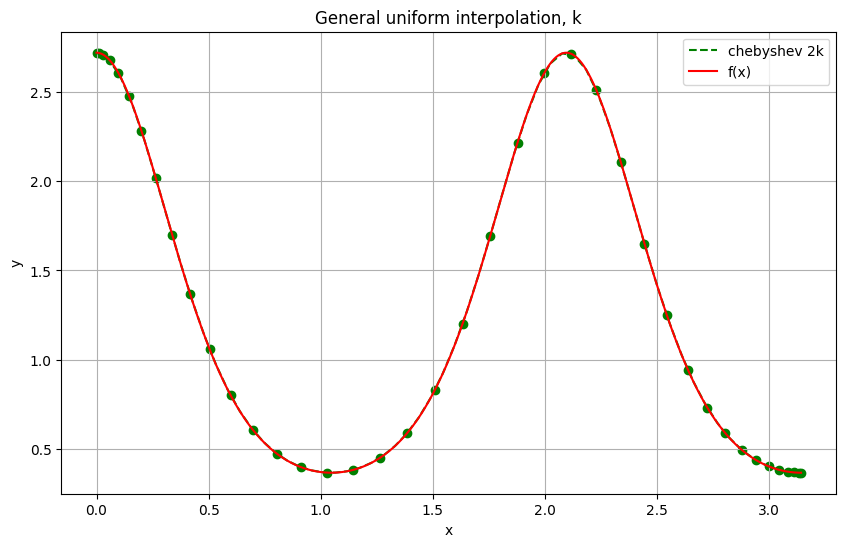

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(x_list_extended, y_inter_chebyshev_2k, 'g--', label='chebyshev 2k')
plt.plot(np.linspace(x_min, x_max, 1000), f(np.linspace(x_min, x_max, 1000)), 'r-', label='f(x)')
plt.scatter(x_list_chebyshev, f(x_list_chebyshev), c='g')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('General uniform interpolation, k')
plt.grid(True)

In [68]:
mse = lambda y1, y2: np.sqrt(np.mean((y1 - y2) ** 2))

error_uniform_1k = mse(f(x_list_extended),  y_inter_uniform_1k)
error_chebyshev_1k = mse(f(x_list_extended), y_inter_chebyshev_1k)

print(f"MSE для uniform: {error_uniform_1k}")
print(f"MSE для chebyshev: {error_chebyshev_1k}")

MSE для uniform: 0.19358735251255246
MSE для chebyshev: 0.001087777907756414


In [69]:
mse = lambda y1, y2: np.sqrt(np.mean((y1 - y2) ** 2))

error_uniform_2k = mse(f(x_list_extended),  y_inter_uniform_2k)
error_chebyshev_2k = mse(f(x_list_extended), y_inter_chebyshev_2k)

print(f"MSE для uniform: {error_uniform_2k}")
print(f"MSE для chebyshev: {error_chebyshev_2k}")

MSE для uniform: 0.006674563627358505
MSE для chebyshev: 7.215279583334551e-08
